#**Implementasi PCA pada beberapa Metode**

##Principal Component Analysis

Principal component analysis (PCA) adalah teknik yang digunakan untuk menyederhanakan suatu data, dengan cara mentransformasi data secara linier sehingga terbentuk sistem koordinat baru dengan varians maksimum. PCA dapat digunakan untuk mereduksi dimensi suatu data tanpa mengurangi karakteristik data tersebut secara signifikan. 

### Import Library

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Kode tersebut mengimpor beberapa pustaka yang umum digunakan dalam analisis dan visualisasi data di Python. Pandas (`pd`) digunakan untuk manipulasi data, NumPy (`np`) digunakan untuk operasi numerik, Seaborn (`sns`) digunakan untuk visualisasi data, dan Matplotlib (`plt`) digunakan untuk membuat plot dan grafik.

###Import Dataset Iris dengan Dataframe Pandas


In [86]:
df=pd.read_csv('https://raw.githubusercontent.com/niswatulsifa/data_iris/master/IrisDataset.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. `df=pd.read_csv('https://raw.githubusercontent.com/niswatulsifa/data_iris/master/IrisDataset.csv', sep=',')`: Kode ini menggunakan fungsi `read_csv()` dari pustaka pandas (`pd`) untuk membaca file CSV dari URL yang diberikan. File CSV tersebut merupakan dataset Iris yang diambil dari repositori GitHub. Parameter `sep=','` digunakan untuk menentukan pemisah antar kolom dalam file CSV.

2. `df.head()`: Kode ini digunakan untuk mencetak lima baris pertama dari DataFrame `df`. Fungsi `head()` adalah salah satu metode pandas yang berguna untuk melihat beberapa baris awal dari sebuah DataFrame.

###menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species'

In [87]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Kode tersebut menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species' dari DataFrame `df` dan menampilkannya.

###mengembalikan daftar kolom yang ada dalam DataFrame

In [88]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Kode tersebut mengembalikan daftar kolom yang ada dalam DataFrame `df`.

###memisahkan data dalam DataFrame


In [89]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

1. X=df.iloc[:,0:4].values mengambil nilai-nilai dari kolom 0 hingga 3 dari DataFrame df dan menyimpannya dalam variabel X.

2. y=df.iloc[:,4].values mengambil nilai-nilai dari kolom ke-4 (kolom "species") dari DataFrame df dan menyimpannya dalam variabel y.

###membuat gambar histogram dari empat fitur dalam DataFrame 'X'

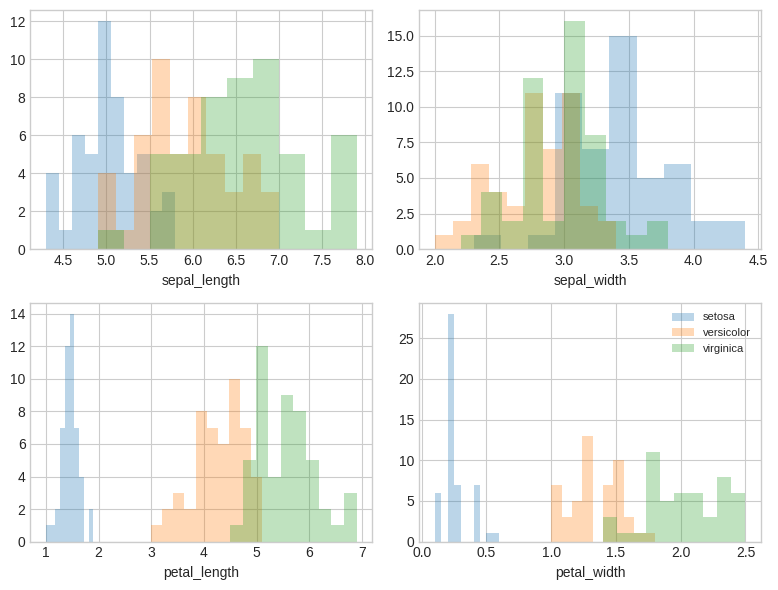

In [90]:
label_dict={1: 'setosa',
           2: 'versicolor',
           3: 'virginica'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('setosa','versicolor','virginica'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

1. label_dict adalah kamus yang memetakan nilai numerik (1, 2, 3) ke nama spesies ("setosa", "versicolor", "virginica").

2. feature_dict adalah kamus yang memetakan indeks fitur (0, 1, 2, 3) ke nama fitur ("sepal_length", "sepal_width", "petal_length", "petal_width").

3. with plt.style.context('seaborn-whitegrid'): mengatur gaya plot menjadi "seaborn-whitegrid".

4. plt.figure(figsize=(8,6)) membuat gambar dengan ukuran 8x6.

5. loop for i in range(4), kode berikutnya akan membuat subplot untuk setiap fitur.

6. plt.subplot(2,2,i+1) mengatur subplot dengan ukuran 2x2.

7. for lab in ('setosa','versicolor','virginica') akan mengulangi tiga spesies dan membuat histogram untuk setiap spesies dengan menggunakan data yang sesuai.

8. plt.hist(X[y==lab, i], label=lab, bins=10, alpha=0.3) membuat histogram dengan menggunakan nilai fitur dari spesies yang sesuai. Parameter bins=10 mengatur jumlah bin histogram menjadi 10, dan alpha=0.3 mengatur transparansi histogram.

9. plt.xlabel(feature_dict[i]) memberi label sumbu x pada subplot saat ini dengan nama fitur yang sesuai.

10. plt.legend(loc='upper right', fancybox=True, fontsize=8) menampilkan legenda dengan label spesies di sudut kanan atas plot. Parameter fancybox=True mengatur tampilan kotak legenda yang bergaya.

11. plt.tight_layout() menyesuaikan tata letak plot agar lebih rapi.
plt.show() menampilkan plot histogram.

###melakukan penskalaan standar pada data menggunakan library scikit-learn

In [91]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

###menghitung dan mencetak matriks kovarian dari data yang telah distandardisasi.

In [92]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)

Covariance Matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Kode tersebut melakukan normalisasi data menggunakan StandardScaler dan kemudian menghitung matriks kovarian dari data yang telah dinormalisasi. Hasilnya dicetak sebagai "Covariance Matrix" diikuti oleh nilai matriks kovarian.

###mencetak matriks kovarian menggunakan np.cov pada data yang telah distandardisasi.

In [93]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Kode tersebut menghitung matriks kovarian dari data yang telah dinormalisasi `X_std` menggunakan fungsi `np.cov()`. Hasilnya dicetak sebagai "Numpy Covariance matrix" diikuti oleh nilai matriks kovarian.

###menghitung eigenvector dan eigenvalue dari matriks kovarian, dan mencetak hasilnya.

In [94]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.93035378 0.92740362 0.14834223 0.02074601]


Kode tersebut menghitung eigenvektor dan eigennilai dari matriks kovarian menggunakan `np.linalg.eig()`. Hasilnya dicetak sebagai "Eigenvectors" diikuti oleh nilai eigenvektor, dan "Eigenvalues" diikuti oleh nilai eigennilai.

##Matriks Korelasi

###menghitung matriks korelasi, eigenvector, dan eigenvalue, kemudian mencetak hasilnya.

In [95]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


Kode tersebut menghitung matriks korelasi `corr_mat1` dari data yang telah dinormalisasi `X_std` menggunakan fungsi `np.corrcoef()`. Selanjutnya, kode menghitung eigenvektor dan eigennilai dari matriks korelasi tersebut menggunakan `np.linalg.eig()`. Hasilnya dicetak sebagai "Eigenvectors" diikuti oleh nilai eigenvektor, dan "Eigenvalues" diikuti oleh nilai eigennilai.

In [96]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


###menggunakan Singular Value Decomposition (SVD) pada transpose matriks X_std dan hasilnya disimpan dalam variabel u.

In [97]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

Kode tersebut menghitung SVD (Singular Value Decomposition) dari matriks data yang telah dinormalisasi `X_std.T` menggunakan `np.linalg.svd()`. Hasilnya, nilai-nilai dari SVD disimpan dalam variabel `u`, `s`, dan `v`. Kemudian, kode mencetak nilai dari `u`, yang merupakan matriks utama dari SVD.

###memverifikasi norma eigenvector dan mencetak pesan jika valid.

In [98]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


Kode tersebut melakukan iterasi melalui setiap vektor eigen `ev` yang telah di-transpose (`eig_vecs.T`). Pada setiap iterasi, kode menggunakan `np.linalg.norm()` untuk menghitung norma dari vektor eigen tersebut, dan kemudian memastikan bahwa norma tersebut mendekati nilai 1 dengan menggunakan `np.testing.assert_array_almost_equal()`. Jika semua vektor eigen memiliki norma mendekati 1, maka pesan "Everything is ok" akan dicetak. Kode ini digunakan untuk memverifikasi bahwa vektor eigen yang dihitung benar-benar merupakan vektor unit.

###Membuat daftar pasangan (nilai eigen, vektor eigen)

In [99]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072249
0.1473532783050959
0.020607707235624884


Kode tersebut mengurutkan eigennilai dalam urutan menurun dan mencetaknya. Eigennilai adalah angka yang menggambarkan variasi atau pentingnya setiap vektor eigen dalam matriks data.

###Menghitung persentase variasi dan kumulatif menggunakan eigenvalues terurut.

In [100]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

Kode tersebut menghitung persentase variasi yang dijelaskan oleh setiap eigennilai, serta menghitung akumulasi persentase variasi dari eigennilai tersebut.

###membuat gambar persentase variasi dan variasi kumulatif yang dijelaskan.

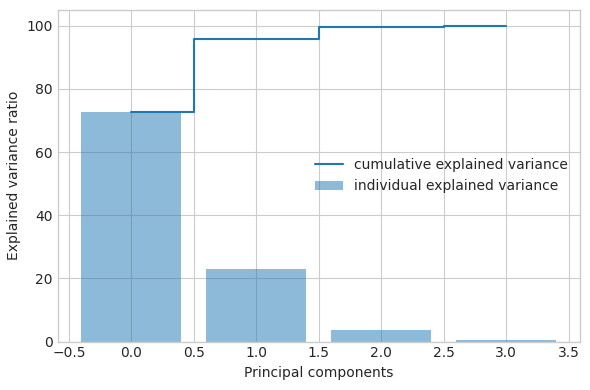

In [101]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

1. with plt.style.context('seaborn-whitegrid'):: Kode ini mengatur gaya plot menggunakan seaborn-whitegrid untuk tampilan yang lebih rapi.

2. plt.figure(figsize=(6, 4)): Kode ini membuat objek gambar dengan ukuran 6x4 menggunakan plt.figure().

3. plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual explained variance'): Kode ini membuat grafik batang dengan tinggi yang sesuai dengan persentase variasi yang dijelaskan oleh setiap komponen utama. Garis batas pada setiap batang diatur di tengah (align='center'). Garis batas ditampilkan dengan transparansi alpha=0.5. Label untuk grafik batang ini adalah 'individual explained variance'.

4. plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance'): Kode ini membuat grafik langkah yang menunjukkan akumulasi variasi yang dijelaskan oleh komponen utama. Grafik langkah menunjukkan kenaikan nilai secara bertahap. Label untuk grafik langkah ini adalah 'cumulative explained variance'.

5. plt.ylabel('Explained variance ratio'): Kode ini menetapkan label sumbu y sebagai 'Explained variance ratio', yang menggambarkan persentase variasi yang dijelaskan.

6. plt.xlabel('Principal components'): Kode ini menetapkan label sumbu x sebagai 'Principal components', yang menggambarkan komponen utama.

7. plt.legend(loc='best'): Kode ini menampilkan legenda dengan posisi terbaik (loc='best') yang mencakup label-label yang ditetapkan sebelumnya.

8. plt.tight_layout(): Kode ini mengatur tata letak plot secara otomatis untuk memastikan elemen-elemen plot terlihat dengan baik.

###menggabungkan dua vektor eigen terpilih menjadi sebuah matriks

In [102]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


1. matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))`: Kode ini menggabungkan dua vektor eigen teratas dari `eig_pairs` ke dalam matriks `matrix_w`. Fungsi `np.hstack()` digunakan untuk menggabungkan vektor secara horizontal. `eig_pairs[0][1]` adalah vektor eigen teratas pertama, sedangkan `eig_pairs[1][1]` adalah vektor eigen teratas kedua. Fungsi `reshape(4,1)` digunakan untuk mengubah dimensi vektor menjadi `(4,1)` sehingga dapat digabungkan dalam matriks. Hasilnya disimpan dalam variabel `matrix_w`.

2. print('Matrix W:\n', matrix_w)`: Kode ini mencetak matriks `matrix_w` dengan pesan "Matrix W:".

###mengalikan matriks X_std dengan matriks W dan menyimpan hasilnya dalam matriks Y.

In [103]:
Y = X_std.dot(matrix_w)

Y = X_std.dot(matrix_w): Kode ini melakukan perkalian antara matriks data yang telah dinormalisasi X_std dengan matriks transformasi matrix_w menggunakan operator dot(). Hasilnya disimpan dalam variabel Y, yang merupakan matriks hasil transformasi.

###membuat scatter plot dua dimensi dengan warna berbeda untuk setiap label.

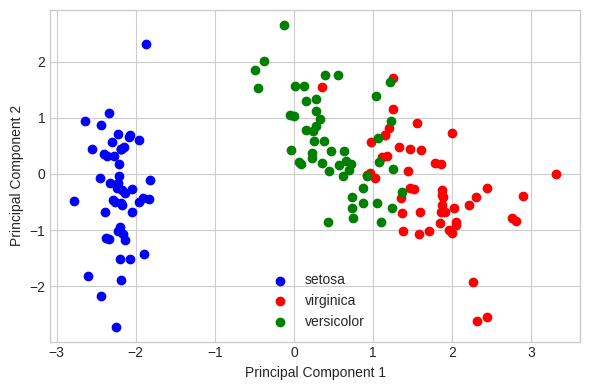

In [104]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'virginica', 'versicolor'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

Kode tersebut membuat scatter plot dari hasil transformasi `Y` dengan dua komponen utama. Setiap kelas ditampilkan dengan warna yang berbeda dalam plot tersebut.

###mengubah data 'X_std' menjadi matriks 'Y_sklearn' berdimensi dua.


In [105]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

###membuat scatter plot dua dimensi dengan warna berbeda untuk setiap label

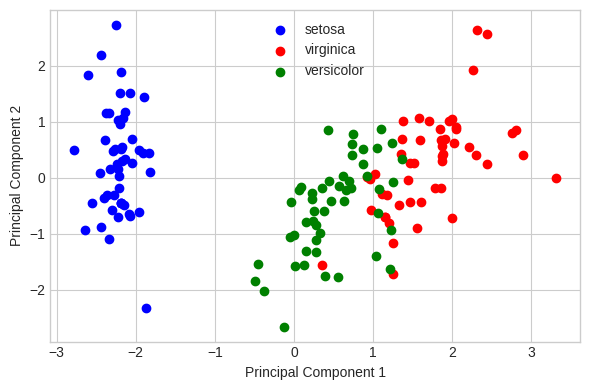

In [106]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'virginica', 'versicolor'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

Kode tersebut menggunakan metode PCA dari scikit-learn untuk melakukan reduksi dimensi dan membuat scatter plot dari hasil transformasi. Hasil transformasi disimpan dalam variabel `Y_sklearn`, dan plot tersebut menampilkan titik-titik dengan warna yang berbeda untuk setiap kelas.

###DataFrame 'data' yang berisi kolom 'X' dan 'Y' yang berisi nilai dari matriks Y_sklearn.

In [107]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


Kode tersebut membuat sebuah DataFrame dari hasil transformasi PCA (`Y_sklearn`). DataFrame tersebut memiliki dua kolom dengan nama 'X' dan 'Y', yang mewakili komponen utama pertama dan kedua.

In [108]:
data['species']=df['species']
data

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


Kode tersebut menambahkan kolom 'species' ke DataFrame `data` dan mengisinya dengan nilai dari kolom 'species' pada DataFrame `df`.

###**Metode Naive Bayes**

###Spliting Data

In [109]:
dataset =data
X = dataset.iloc[:,:2].values
y = dataset['species'].values
dataset.head(5)

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


In [110]:
dataset =data
X = dataset.iloc[:,:2].values
y = dataset['species'].values
dataset.head(5)

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


Kode tersebut mengatur dataset dengan menggunakan DataFrame `data`. Variabel `X` diisi dengan nilai dari dua kolom pertama dalam dataset, sedangkan variabel `y` diisi dengan nilai dari kolom 'species'. Kemudian, dataset yang telah diatur ditampilkan dengan menggunakan metode `head()` untuk melihat lima baris pertama.

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Kode tersebut menggunakan modul `train_test_split` dari scikit-learn untuk membagi dataset menjadi data latih dan data uji. Variabel `X_train` dan `y_train` berisi data latih, sedangkan variabel `X_test` dan `y_test` berisi data uji. Data uji sebesar 20% dari dataset awal dengan seed (random state) 42.

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Kode tersebut menggunakan modul `StandardScaler` dari scikit-learn untuk melakukan penskalaan fitur pada data. Variabel `X_train` diubah menggunakan metode `fit_transform()` untuk menghitung rata-rata dan standar deviasi dari data latih, dan kemudian melakukan penskalaan pada data latih. Variabel `X_test` diubah menggunakan metode `transform()` untuk menerapkan penskalaan yang sama pada data uji, menggunakan rata-rata dan standar deviasi yang sudah dihitung dari data latih.

###Import modul GaussianNB

In [113]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Kode tersebut menggunakan modul `GaussianNB` dari scikit-learn untuk membuat model klasifikasi Naive Bayes dengan menggunakan distribusi Gaussian. Model tersebut dilatih dengan memasukkan data latih (`X_train` dan `y_train`) menggunakan metode `fit()`.

###Melakukan Prediksi

In [114]:
y_pred = classifier.predict(X_test) 
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

Kode tersebut menggunakan model klasifikasi yang telah dilatih (`classifier`) untuk melakukan prediksi pada data uji (`X_test`). Hasil prediksi disimpan dalam variabel `y_pred`.

###Menghitung Akurasi dan menampilkan Confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9666666666666667


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

Kode tersebut menggunakan modul `confusion_matrix` dari scikit-learn untuk menghitung matriks kebingungan antara label sebenarnya (`y_test`) dan label prediksi (`y_pred`). Hasil matriks kebingungan disimpan dalam variabel `cm`. Selanjutnya, kode menggunakan modul `accuracy_score` untuk menghitung akurasi prediksi dari model. Akurasi tersebut kemudian dicetak dengan menggunakan `print()`. Terakhir, matriks kebingungan juga dicetak (`cm`).

###**Metode KNN**

###Spliting Data

In [116]:
dataset = data
X = dataset.iloc[:,:2].values
y = dataset['species'].values
dataset.head(5)

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


Kode tersebut mengatur dataset dengan menggunakan DataFrame `data`. Variabel `X` diisi dengan nilai dari dua kolom pertama dalam dataset, sedangkan variabel `y` diisi dengan nilai dari kolom 'species'. Kemudian, dataset yang telah diatur ditampilkan dengan menggunakan metode `head()` untuk melihat lima baris pertama.

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Kode tersebut menggunakan modul `train_test_split` dari scikit-learn untuk membagi dataset menjadi data latih dan data uji. Variabel `X_train` dan `y_train` berisi data latih, sedangkan variabel `X_test` dan `y_test` berisi data uji. Data uji sebesar 20% dari dataset awal dengan seed (random state) 42.

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Kode tersebut menggunakan modul `StandardScaler` dari scikit-learn untuk melakukan penskalaan fitur pada data. Variabel `X_train` diubah menggunakan metode `fit_transform()` untuk menghitung rata-rata dan standar deviasi dari data latih, dan kemudian melakukan penskalaan pada data latih. Variabel `X_test` diubah menggunakan metode `transform()` untuk menerapkan penskalaan yang sama pada data uji, menggunakan rata-rata dan standar deviasi yang sudah dihitung dari data latih.

###Import Modul KNeighborsClassifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Kode tersebut menggunakan modul `KNeighborsClassifier` dari scikit-learn untuk membuat model klasifikasi K-Nearest Neighbors (KNN) dengan jumlah tetangga terdekat sebanyak 5. Model tersebut dilatih dengan memasukkan data latih (`X_train` dan `y_train`) menggunakan metode `fit()`.

###Melakukan Prediksi

In [120]:
y_pred = classifier.predict(X_test) 
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

Kode tersebut menggunakan model klasifikasi K-Nearest Neighbors (KNN) yang telah dilatih (`classifier`) untuk melakukan prediksi pada data uji (`X_test`). Hasil prediksi disimpan dalam variabel `y_pred`.

###Menghitung Akurasi dan menampilkan Confusion Matrix

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  2,  9]])

Kode tersebut menggunakan modul `confusion_matrix` dari scikit-learn untuk menghitung matriks kebingungan antara label sebenarnya (`y_test`) dan label prediksi (`y_pred`). Hasil matriks kebingungan disimpan dalam variabel `cm`. Selanjutnya, kode menggunakan modul `accuracy_score` untuk menghitung akurasi prediksi dari model. Akurasi tersebut kemudian dicetak dengan menggunakan `print()`. Terakhir, matriks kebingungan juga dicetak (`cm`).

###Membuat Dataframe yang berisi menampilkan label sebenarnya dan label yang diprediksi untuk setiap data pada data uji.

In [122]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,virginica
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


Kode tersebut membuat DataFrame `df` yang berisi kolom "Real Values" yang berisi nilai sebenarnya dari data uji (`y_test`) dan kolom "Predicted Values" yang berisi nilai prediksi dari model (`y_pred`).

###**Metode ANN**

In [123]:
dt=data
dt

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


Kode tersebut mengatur DataFrame `dt` dengan menggunakan DataFrame `data`. DataFrame `dt` akan memiliki struktur yang sama dengan DataFrame `data`.

###Import Modul MLPClassifier

In [124]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Kode tersebut mengimpor beberapa modul dari scikit-learn, yaitu `MLPClassifier` untuk membuat model jaringan saraf tiruan, `train_test_split` untuk membagi data menjadi data latih dan data uji, `accuracy_score` untuk menghitung akurasi prediksi, dan `confusion_matrix` untuk menghitung matriks kebingungan.

In [125]:
y = dt['species']
x = dt.drop(['species'], axis=1)

Kode tersebut mengatur variabel `y` dengan kolom 'species' dari DataFrame `dt`, sementara variabel `x` mengatur DataFrame `dt` dengan menghapus kolom 'species' menggunakan metode `drop()`. Variabel `x` akan berisi fitur-fitur lainnya selain kolom 'species'.

###Splitting Data

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=27)

Kode tersebut menggunakan modul `train_test_split` dari scikit-learn untuk membagi data menjadi data latih dan data uji. Variabel `x_train` dan `y_train` berisi data latih, sedangkan variabel `x_test` dan `y_test` berisi data uji. Data uji sebesar 20% dari dataset awal dengan seed (random state) 27.

###Konfigurasi Pada Modul MLPClassifier

In [127]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.001)

Kode tersebut membuat objek `clf` yang merupakan model klasifikasi jaringan saraf tiruan (MLPClassifier) dengan spesifikasi berikut:
- `hidden_layer_sizes=(100, 100, 100)`: Model memiliki 3 lapisan tersembunyi, masing-masing dengan 100 neuron.
- `max_iter=1000`: Jumlah iterasi maksimum saat melatih model.
- `alpha=0.0001`: Parameter yang mengontrol kekuatan regularisasi.
- `solver='sgd'`: Algoritma yang digunakan untuk memperbarui bobot.
- `verbose=10`: Menampilkan informasi detail selama proses pelatihan dengan interval setiap 10 iterasi.
- `random_state=21`: Seed (random state) untuk menghasilkan hasil yang konsisten.
- `tol=0.001`: Toleransi untuk kriteria penghentian pelatihan.

###Melatih Model MLPClassifier

In [128]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

Iteration 1, loss = 1.12425212
Iteration 2, loss = 1.12259787
Iteration 3, loss = 1.12024753
Iteration 4, loss = 1.11728118
Iteration 5, loss = 1.11376419
Iteration 6, loss = 1.10976449
Iteration 7, loss = 1.10533755
Iteration 8, loss = 1.10053478
Iteration 9, loss = 1.09540901
Iteration 10, loss = 1.08999489
Iteration 11, loss = 1.08433644
Iteration 12, loss = 1.07847704
Iteration 13, loss = 1.07244954
Iteration 14, loss = 1.06628675
Iteration 15, loss = 1.06001100
Iteration 16, loss = 1.05365452
Iteration 17, loss = 1.04723564
Iteration 18, loss = 1.04077332
Iteration 19, loss = 1.03429769
Iteration 20, loss = 1.02781424
Iteration 21, loss = 1.02132868
Iteration 22, loss = 1.01485323
Iteration 23, loss = 1.00839348
Iteration 24, loss = 1.00196105
Iteration 25, loss = 0.99554671
Iteration 26, loss = 0.98917157
Iteration 27, loss = 0.98284874
Iteration 28, loss = 0.97657544
Iteration 29, loss = 0.97034436
Iteration 30, loss = 0.96414583
Iteration 31, loss = 0.95798757
Iteration 32, los

Kode tersebut melatih model klasifikasi jaringan saraf tiruan (`clf`) menggunakan data latih (`x_train` dan `y_train`) dengan menggunakan metode `fit()`. Selanjutnya, model tersebut digunakan untuk melakukan prediksi pada data uji (`x_test`) dengan menggunakan metode `predict()`, dan hasil prediksi disimpan dalam variabel `y_pred`.

###Menghitung Akurasi Model

In [129]:
accuracy_score(y_test, y_pred)

0.8666666666666667

Kode tersebut menggunakan modul `accuracy_score` dari scikit-learn untuk menghitung akurasi prediksi model. Fungsi `accuracy_score()` membandingkan label sebenarnya (`y_test`) dengan label prediksi (`y_pred`) dan menghasilkan nilai akurasi sebagai hasilnya.

###Membuat Dataframe yang berisi menampilkan label sebenarnya dan label yang diprediksi untuk setiap data pada data uji.

In [130]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
116,virginica,virginica
36,setosa,setosa
128,virginica,virginica
117,virginica,virginica
88,versicolor,versicolor
74,versicolor,versicolor
91,versicolor,versicolor
115,virginica,virginica
77,versicolor,virginica
21,setosa,setosa


Kode tersebut membuat DataFrame `df` yang berisi dua kolom, yaitu "Real Values" yang berisi nilai sebenarnya (`y_test`) dan "Predicted Values" yang berisi nilai prediksi (`y_pred`). DataFrame ini digunakan untuk membandingkan nilai sebenarnya dan nilai prediksi dari model.

###**Metode DecisionTree**

In [131]:
df = data
df

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


Kode tersebut mengatur DataFrame `df` dengan menggunakan DataFrame `data`. DataFrame `df` akan memiliki struktur yang sama dengan DataFrame `data`.

In [132]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Kode tersebut menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species' dari DataFrame `df`. Fungsi `value_counts()` digunakan untuk menghitung frekuensi kemunculan setiap nilai unik dan mengembalikan hasil dalam bentuk Series.

In [133]:
df.isnull().sum()

X          0
Y          0
species    0
dtype: int64

Kode tersebut menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom DataFrame `df`. Fungsi `isnull()` digunakan untuk mengidentifikasi nilai yang hilang, kemudian fungsi `sum()` digunakan untuk menjumlahkan jumlah nilai yang hilang dalam setiap kolom. Hasilnya adalah jumlah nilai yang hilang dalam setiap kolom DataFrame `df`.

In [134]:
X = df.drop(['species'], axis=1)
y = df['species']

Kode tersebut memisahkan fitur-fitur dari DataFrame `df` ke dalam variabel `X`, dengan menghilangkan kolom 'species'. Kemudian, kolom 'species' dari DataFrame `df` disimpan dalam variabel `y`. Dengan demikian, `X` akan berisi fitur-fitur data dan `y` akan berisi label kelas atau target.

###Spliting Data

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21)

Kode tersebut menggunakan modul `train_test_split` dari scikit-learn untuk membagi dataset menjadi data latih dan data uji. Variabel `X_train` dan `y_train` akan berisi data latih, sedangkan variabel `X_test` dan `y_test` akan berisi data uji. Dataset dipisahkan dengan proporsi data uji sebesar 33% (dalam hal ini, test_size=0.33), dan pengacakan data dilakukan dengan menggunakan nilai random_state=21 untuk memastikan hasil yang dapat direproduksi.

In [136]:
X_train.shape, X_test.shape

((100, 2), (50, 2))

Kode tersebut digunakan untuk mengakses bentuk (shape) dari data latih (`X_train`) dan data uji (`X_test`). `X_train.shape` akan mengembalikan tuple yang menunjukkan jumlah baris dan kolom dalam data latih, sedangkan `X_test.shape` akan mengembalikan tuple yang menunjukkan jumlah baris dan kolom dalam data uji.

In [137]:
X_train.dtypes

X    float64
Y    float64
dtype: object

Kode tersebut digunakan untuk mendapatkan tipe data dari setiap kolom dalam DataFrame `X_train`. Fungsi `dtypes` digunakan untuk mengakses tipe data dari setiap kolom, yang akan mengembalikan hasil dalam bentuk objek Series yang berisi tipe data dari setiap kolom dalam DataFrame `X_train`.

In [138]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Kode pertama (`!pip install category_encoders`) menginstal pustaka Python bernama "category_encoders" menggunakan pip, yang diperlukan untuk menjalankan kode selanjutnya. Kode kedua (`import category_encoders as ce`) mengimpor pustaka "category_encoders" dan menginisialisasinya dengan alias `ce`, sehingga pustaka tersebut dapat digunakan dalam kode selanjutnya.

In [139]:
encoder = ce.OrdinalEncoder(cols=["X","Y"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Kode tersebut menggunakan pustaka "category_encoders" untuk melakukan encoding ordinal pada kolom-kolom "X" dan "Y" dalam DataFrame `X_train` dan DataFrame `X_test`. Encoder ordinal menggantikan nilai-nilai kategorikal dengan angka berdasarkan urutan ordinalnya. Pertama, objek encoder ordinal (`encoder`) diinisialisasi dengan kolom-kolom yang ingin dienkripsi ditentukan. Kemudian, metode `fit_transform` digunakan pada DataFrame `X_train` untuk melakukan encoding ordinal pada kolom-kolom yang ditentukan, dan hasilnya disimpan kembali ke `X_train`. Selanjutnya, metode `transform` digunakan pada DataFrame `X_test` untuk mengaplikasikan encoding ordinal yang sama, dan hasilnya disimpan ke `X_test`.

In [140]:
X_train.head()

,X,Y
52,1,1
49,2,2
65,3,3
118,4,4
55,5,5


Kode tersebut menampilkan beberapa baris pertama dari DataFrame `X_train` dengan menggunakan metode `head()`. Metode ini digunakan untuk melihat sebagian data dari DataFrame `X_train` sebagai representasi singkat dari isi dataframe tersebut.

In [141]:
X_test.head()

,X,Y
92,-1.0,-1.0
44,-1.0,-1.0
7,-1.0,-1.0
21,-1.0,-1.0
95,-1.0,-1.0


Kode tersebut menampilkan beberapa baris pertama dari DataFrame `X_test` dengan menggunakan metode `head()`. Metode ini digunakan untuk melihat sebagian data dari DataFrame `X_test` sebagai representasi singkat dari isi dataframe tersebut.

###Import Modul DecisionTreeClassifier

In [142]:
from sklearn.tree import DecisionTreeClassifier

Kode tersebut mengimpor kelas DecisionTreeClassifier dari pustaka scikit-learn (sklearn). DecisionTreeClassifier adalah sebuah algoritma pembelajaran mesin yang digunakan untuk membangun model pohon keputusan untuk masalah klasifikasi. Dengan mengimpor kelas ini, kita dapat membuat objek DecisionTreeClassifier yang akan digunakan untuk melatih dan menguji model pohon keputusan pada data.

In [143]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=21)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=21)

Kode tersebut membuat objek DecisionTreeClassifier dengan menggunakan kriteria 'gini' dan batasan kedalaman maksimum sebesar 3. Objek tersebut kemudian dilatih dengan menggunakan data X_train dan y_train menggunakan metode fit(). Dalam konteks ini, model pohon keputusan akan menggunakan metode gini impurity untuk melakukan pemisahan node dan akan memiliki kedalaman maksimum sebanyak 3 level.

###Melakukan Prediksi Pada Data Uji

In [144]:
y_pred_gini = clf_gini.predict(X_test)

Kode tersebut menggunakan model DecisionTreeClassifier yang telah dilatih sebelumnya (clf_gini) untuk melakukan prediksi pada data uji (X_test). Hasil prediksi tersebut disimpan dalam variabel y_pred_gini.

###Menghitung Akurasi model menggunakan kriteria indeks Gini pada data uji

In [145]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.36


Kode tersebut mengimport modul accuracy_score dari sklearn.metrics. Kemudian, menggunakan fungsi accuracy_score, menghitung nilai akurasi antara nilai sebenarnya (y_test) dan nilai prediksi (y_pred_gini) yang dihasilkan oleh model dengan kriteria gini index. Hasil akurasi tersebut kemudian dicetak.

###Melakukan Prediksi pada Data Latih

In [146]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virg

Kode tersebut menggunakan model DecisionTreeClassifier (clf_gini) yang telah dilatih sebelumnya untuk melakukan prediksi pada data latih (X_train). Hasil prediksi tersebut disimpan dalam variabel y_pred_train_gini.

In [147]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.50


Kode tersebut mengimport modul accuracy_score dari sklearn.metrics. Kemudian, menggunakan fungsi accuracy_score, menghitung nilai akurasi antara nilai sebenarnya pada data latih (y_train) dan nilai prediksi pada data latih (y_pred_train_gini) yang dihasilkan oleh model dengan kriteria gini index. Hasil akurasi tersebut kemudian dicetak.

###Menghitung skor model pada data latih dan data uji

In [148]:
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.50
Test set score: 0.36


Kode tersebut mencetak skor model pada data latih dan data uji. Skor pada data latih dihitung dengan menggunakan metode `score` dari objek `clf_gini` dengan argumen `X_train` dan `y_train`, dan skor pada data uji dihitung dengan menggunakan metode `score` dengan argumen `X_test` dan `y_test`. Hasil skor tersebut kemudian dicetak dengan format dua desimal.

###Membuat Visualisasi DecisionTree

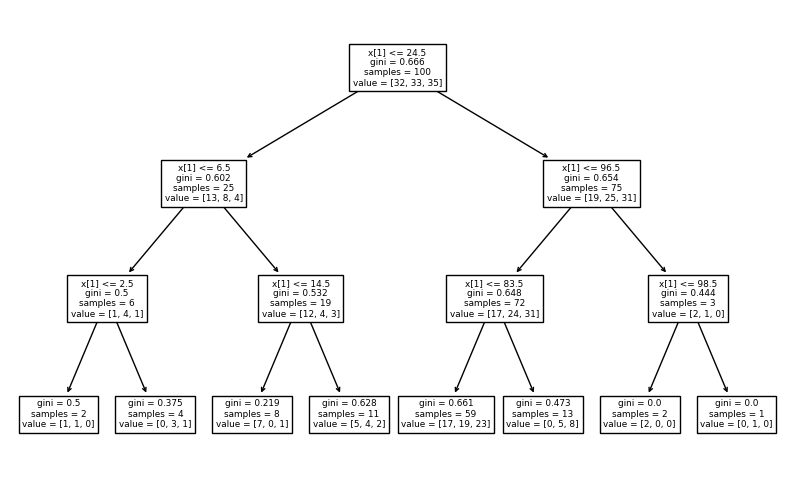

In [149]:
plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

Kode tersebut menghasilkan visualisasi dari pohon keputusan yang dilatih dengan menggunakan algoritma Gini. Visualisasi tersebut dibuat menggunakan fungsi `plot_tree` dari modul `tree` dalam library `sklearn`. Hasil visualisasi pohon keputusan ditampilkan dalam sebuah plot dengan ukuran 10x6.

#**Kesimpulan**

Dari beberapa metode yang digunakan yaitu Decision Tree, KNN , Naive Bayes dan ANN untuk klasifikasi menggunakan dataset iris yang berjumlah 150 data dengan jumlah label sebanyak 3 kelas dimana masing-masing kelas terdapat 50 data dengan jumlah 4 fitur . Kemudian dilakukan proses PCA yang awalnya memiliki 4 fitur menjadi memiliki 2 fitur. setelah itu dilakukan pembagian data 80:20 yaitu data training sebanyak 80% dan data latih sebanyak 20%. 

Maka, didapatkan hasil perbandingan antara Klasifikasi menggunakan dataset iris tanpa dilakukan PCA dan klasifikasi dataset iris menggunakan PCA sebagai berikut:

1. pada metode Naive Bayes didapatkan hasil akurasi 0.1 atau 100%  Sedangkan nilai akurasi yang didapatkan setelah dilakukan PCA yaitu 0.96 atau 96%.

2. pada metode KNN nilai akurasi yang didapat yaitu 1.0 dengan jumlah k = 5  Sedangkan nilai akurasi yang didapatkan setelah dilakukan PCA yaitu 0.9 atau 90%.

3. pada metode ANN didapatkan hasil akurasi 0.93 atau 93% Sedangkan nilai akurasi yang didapatkan setelah dilakukan PCA yaitu 0.86 atau 86%.

4. Pada metode Decision Tree nilai akurasi yang didapat menggunakan kriteria indeks Gini dengan batasan kedalaman maksimum pohon (max_depth) adalah 3 didapatkan hasil akurasi 1.0 atau 100% Sedangkan nilai akurasi yang didapatkan setelah dilakukan PCA yaitu 0.36 atau 36%.